# Part A: IMDb Movie Review Sentiment Analysis

## Task 1: Data Exploration and Preprocessing (5 Marks)

### Analyze the dataset for trends, missing values, and outliers.
Perform basic data exploration, such as checking for missing values,
identifying imbalanced classes (positive/negative), and analyzing the length of
reviews.

In [1]:
# Step 1: Load & Explore the Data
import pandas as pd

# Load dataset
df = pd.read_csv('data_imdb.csv')

# Basic exploration
print(df.head())
print(df.info())
print(df['sentiment'].value_counts())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [3]:
# Step 2: Check for Missing Values
# Check for missing values
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


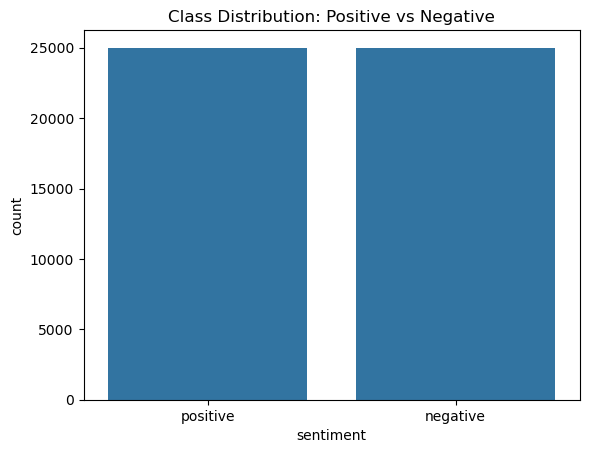

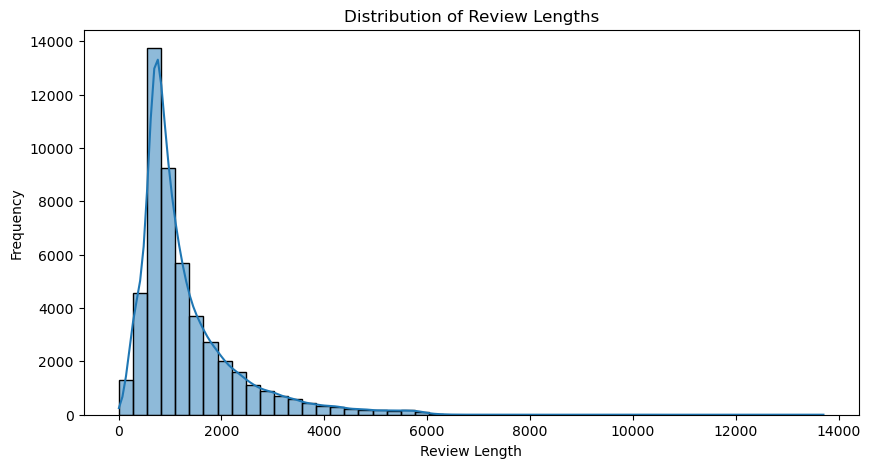

In [5]:
 # Step 3: Analyze Class Balance & Review Length
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(data=df, x='sentiment')
plt.title("Class Distribution: Positive vs Negative")
plt.show()

# Review length analysis
df['review_length'] = df['review'].apply(len)

# Distribution of review lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

### Perform data cleaning and text preprocessing.

Steps will include:

1. Removing stop words, punctuation, and special characters.
3. Tokenization of text (splitting text into words).
4. Lemmatization and stemming.
5. Vectorization using techniques like Bag-of-Words and TF-IDF .

In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # 1. Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # 2. Tokenization
    tokens = word_tokenize(text)
    # 1. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # 3. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

# Apply preprocessing
df['clean_text'] = df['review'].apply(preprocess_text)

In [16]:
# 4. Vectorization using Bag of Words and TF-IDF 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['clean_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

In [14]:
# Check: Labels and Features
# Labels
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert to binary

print("TF-IDF shape:", X_tfidf.shape)
print("Labels shape:", y.shape)


TF-IDF shape: (50000, 5000)
Labels shape: (50000,)


## Task 2: Feature Engineering (10 Marks)

### Feature extraction using techniques like TF-IDF , Word2Vec, or embeddings.
1. Transform the textual data into numerical features that can be used by
machine learning models.

In [18]:
# Already done in task 1
# X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

from gensim.models import Word2Vec
import numpy as np

# Tokenize for Word2Vec training
tokenized_reviews = df['clean_text'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# Function to get average Word2Vec for each review
def get_avg_w2v(tokens, model, k=100):
    vec = np.zeros(k)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    return vec / count if count > 0 else vec

# Apply averaging
X_w2v = np.array([get_avg_w2v(tokens, w2v_model, k=100) for tokens in tokenized_reviews])


### Textual features: Word count, character count, average word length, etc.

In [21]:
# Word count
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

# Character count
df['char_count'] = df['review'].apply(lambda x: len(str(x)))

# Average word length
df['avg_word_length'] = df['char_count'] / df['word_count']


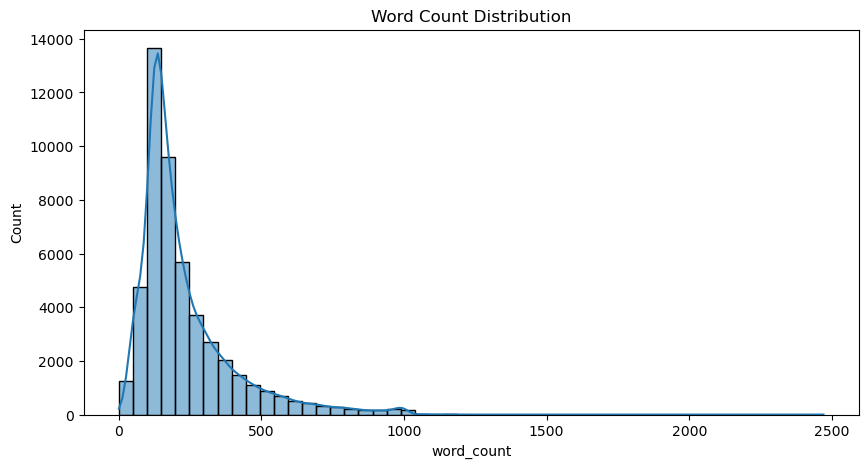

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution')
plt.show()

## Task 3: Model Development (20 Marks)

## Build and train classification models to predict the sentiment of reviews.
1. Experiment with various classification algorithms such as Logistic Regression,
Naive Bayes, Support Vector Machine (SVM), Random Forest, and Neural
Networks (e.g., LSTM, BERT , etc.).

In [26]:
# step 1: Prepare Data for Modeling
from sklearn.model_selection import train_test_split
# Prepare labels
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Binary encoding

# Use TF-IDF features (or you can swap with X_w2v)
X = X_tfidf

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


step 2: Train & Evaluate Multiple Models
compare the following models:
1. Logistic Regression
2. Naive Bayes
3. Support Vector Machine (SVM)
4. Random Forest

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Common Evaluation Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [30]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

print("Logistic Regression Results:")
evaluate_model(lr_model, X_test, y_test)


Logistic Regression Results:
Accuracy: 0.8873
Precision: 0.8787404654801486
Recall: 0.8986
F1-Score: 0.8885592801344804

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [32]:
#2. Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

print("Naive Bayes Results:")
evaluate_model(nb_model, X_test, y_test)

Naive Bayes Results:
Accuracy: 0.8531
Precision: 0.847334251426323
Recall: 0.8614
F1-Score: 0.8543092333630864

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      5000
           1       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [34]:
#3.Support Vector Machine (SVM)
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

print("SVM Results:")
evaluate_model(svm_model, X_test, y_test)

SVM Results:
Accuracy: 0.8806
Precision: 0.8762356662712535
Recall: 0.8864
F1-Score: 0.881288526546033

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [36]:
#4. Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest Results:")
evaluate_model(rf_model, X_test, y_test)

Random Forest Results:
Accuracy: 0.8503
Precision: 0.8570846075433232
Recall: 0.8408
F1-Score: 0.848864209994952

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      5000
           1       0.86      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Task 4: Model Evaluation (5 Marks)
Evaluate the model’s performance using appropriate metrics.

We’ll evaluate all your trained models using the following metrics:

Key Evaluation Metrics:
1. Accuracy: Overall correctness
2. Precision: How many predicted positives are real
3. Recall: How many actual positives were found
4. F1-Score: Balance of precision and recall
5. Confusion Matrix: TP, FP, FN, TN breakdown

In [54]:
# Step 1: Define an Evaluation Function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    if hasattr(y_pred, "toarray"):  # In case of sparse matrix predictions
        y_pred = y_pred.toarray()
    if y_pred.ndim > 1:  # For probabilities or logits
        y_pred = (y_pred > 0.5).astype(int)
    
    print(f"{model_name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Logistic Regression Evaluation
Accuracy: 0.8873
Precision: 0.8787404654801486
Recall: 0.8986
F1 Score: 0.8885592801344804

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



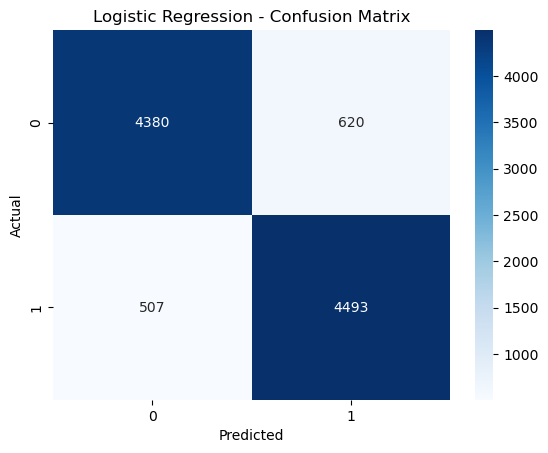

In [56]:
# Step 2: Evaluate All Models
# 1. Logistic Regression
evaluate_classification_model(lr_model, X_test, y_test, "Logistic Regression")

Naive Bayes Evaluation
Accuracy: 0.8531
Precision: 0.847334251426323
Recall: 0.8614
F1 Score: 0.8543092333630864

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      5000
           1       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



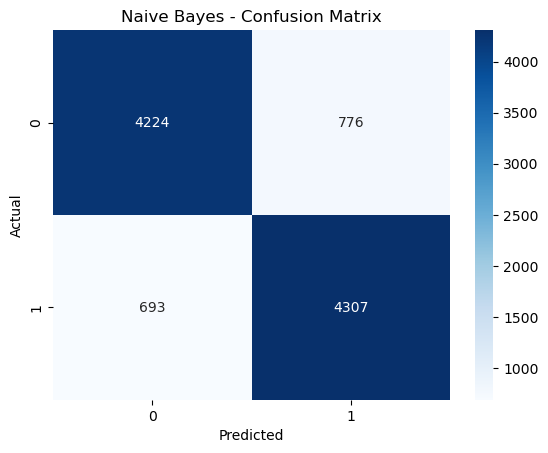

In [67]:
# 2. Naive Bayes
evaluate_classification_model(nb_model, X_test, y_test, "Naive Bayes")

SVM Evaluation
Accuracy: 0.8806
Precision: 0.8762356662712535
Recall: 0.8864
F1 Score: 0.881288526546033

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



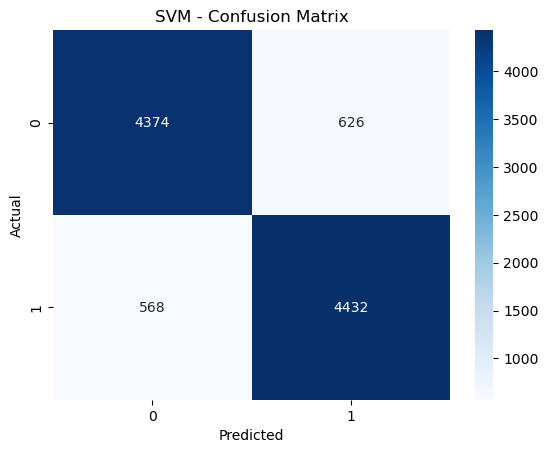

In [69]:
# 3. Support Vector Machine (SVM)
evaluate_classification_model(svm_model, X_test, y_test, "SVM")

Random Forest Evaluation
Accuracy: 0.8503
Precision: 0.8570846075433232
Recall: 0.8408
F1 Score: 0.848864209994952

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      5000
           1       0.86      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



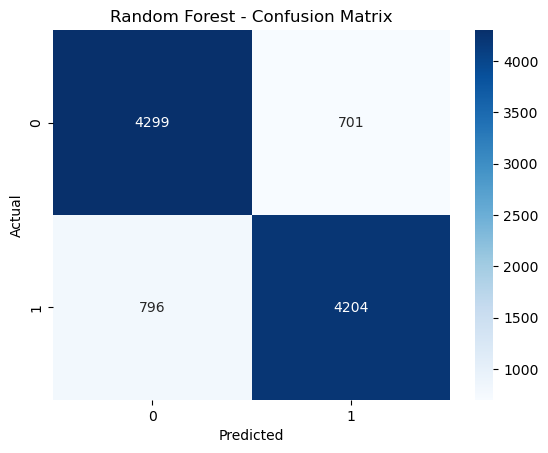

In [71]:
# 4. Random Forest
evaluate_classification_model(rf_model, X_test, y_test, "Random Forest")


## Task 5: Video presentation

https://drive.google.com/file/d/1T3R1ENfaZXrilSTtJOdJM8RAiQWMU7zs/view?usp=sharing